In [1]:
import sys  
sys.path.insert(0, "/Users/admin/UDel/FASTLab/Summer2021_Research/SESNspectraPCA/code")

In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas
import scipy
import astropy.units as u
import astropy.constants as c
from scipy.integrate import trapezoid
from astropy.convolution import convolve_fft, convolve, Gaussian1DKernel

import SNIDsn
import SNIDdataset as snid
import SNePCA

import binSpectra_wf as bs

from pysynphot import observation
from pysynphot import spectrum

from collections import OrderedDict

from importlib import reload

imagedir = "/Users/admin/UDel/FASTLab/Summer2021_Research/imagedir"
# plt.style.use('~/GitHub/custom-matplotlib/custom.mplstyle')

/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/pysynphot/locations.py:46: UserWarning:

PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.

/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/pysynphot/locations.py:345: UserWarning:

Extinction files not found in extinction



## Start generating degraded spectra to recalculate PCA components

In [3]:
reload(bs)

# Form PCA training datasets
dataset0 = snid.loadPickle('../Data/DataProducts/dataset0.pickle')
dataset5 = snid.loadPickle('../Data/DataProducts/dataset5.pickle')
dataset10 = snid.loadPickle('../Data/DataProducts/dataset10.pickle')
dataset15 = snid.loadPickle('../Data/DataProducts/dataset15.pickle')

new_R = 100

for sn, spec in dataset0.items():
    bs.degrade(spec, new_R)
    
for sn, spec in dataset5.items():
    bs.degrade(spec, new_R)
    
for sn, spec in dataset10.items():
    bs.degrade(spec, new_R)
    
for sn, spec in dataset15.items():
    bs.degrade(spec, new_R)
    
# Form testing datasets
valid_dataset0 = {"sn1998dt": dataset0["sn1998dt"]}
del dataset0["sn1998dt"]

### By now, all of the spectra in all four datasets are degraded to the new R value

In [4]:
snidPCA0 = SNePCA.SNePCA(dataset0, -5, 5)
snidPCA5 = SNePCA.SNePCA(dataset5, 0, 10)
snidPCA10 = SNePCA.SNePCA(dataset10, 5, 15)
snidPCA15 = SNePCA.SNePCA(dataset15, 10, 20)

In [5]:
snidPCA0.snidPCA()
snidPCA5.snidPCA()
snidPCA10.snidPCA()
snidPCA15.snidPCA()

In [6]:
"""Now that the spectra are degraded it doesn't make sense to do this"""

# snidPCA10.evecs[0] = -snidPCA10.evecs[0]

# snidPCA5.evecs[1] = -snidPCA5.evecs[1]
# snidPCA10.evecs[1] = -snidPCA10.evecs[1]
# snidPCA15.evecs[1] = -snidPCA15.evecs[1]

# snidPCA0.evecs[2] = -snidPCA0.evecs[2]
# snidPCA5.evecs[2] = -snidPCA5.evecs[2]
# snidPCA15.evecs[2] = -snidPCA15.evecs[2]

# snidPCA0.evecs[3] = -snidPCA0.evecs[3]
# snidPCA5.evecs[3] = -snidPCA5.evecs[3]
# snidPCA10.evecs[3] = -snidPCA10.evecs[3]

# snidPCA0.evecs[4] = -snidPCA0.evecs[4]

"Now that the spectra are degraded it doesn't make sense to do this"

In [7]:
snidPCA0.calcPCACoeffs()
snidPCA5.calcPCACoeffs()
snidPCA10.calcPCACoeffs()
snidPCA15.calcPCACoeffs()

In [8]:
print(snidPCA0.pcaCoeffMatrix.shape)
print(snidPCA5.pcaCoeffMatrix.shape)
print(snidPCA10.pcaCoeffMatrix.shape)
print(snidPCA15.pcaCoeffMatrix.shape)

(54, 54)
(52, 52)
(56, 56)
(54, 54)


In [9]:
# Set colors for plots
snidPCA0.Ib_color = 'steelblue'
snidPCA5.Ib_color = 'steelblue'
snidPCA10.Ib_color = 'steelblue'
snidPCA15.Ib_color = 'steelblue'
snidPCA0.IIb_color = 'limegreen'
snidPCA5.IIb_color = 'limegreen'
snidPCA10.IIb_color = 'limegreen'
snidPCA15.IIb_color = 'limegreen'
snidPCA0.IcBL_color = 'darkgrey'
snidPCA5.IcBL_color = 'darkgrey'
snidPCA10.IcBL_color = 'darkgrey'
snidPCA15.IcBL_color = 'darkgrey'


snidPCA0.IIb_ellipse_color = 'green'
snidPCA5.IIb_ellipse_color = 'green'
snidPCA10.IIb_ellipse_color = 'green'
snidPCA15.IIb_ellipse_color = 'green'
snidPCA0.IcBL_ellipse_color = 'grey'
snidPCA5.IcBL_ellipse_color = 'grey'
snidPCA10.IcBL_ellipse_color = 'grey'
snidPCA15.IcBL_ellipse_color = 'grey'

In [11]:
# snidPCA0.plotEigenspectra((15, 20), 5)

## Calculate PCA coeffs of new SN

In [12]:
newSN = valid_dataset0["sn1998dt"]
newSN.data.dtype

dtype([('Ph1.8', '<f4')])

In [13]:
pca_coef = np.dot(snidPCA0.evecs, newSN.data['Ph1.8'])
pca_coef[:5]

array([ 2.94894174,  0.30357197, -0.75298966,  0.04079191, -0.0395298 ])

['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'r', 'darkgrey']
['limegreen', 'r', 'darkgrey']
['limegreen', 'r', 'darkgrey']
['limegreen', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelbl

/Users/admin/UDel/FASTLab/Summer2021_Research/SESNspectraPCA/code/SNePCA.py:727: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/admin/UDel/FASTLab/Summer2021_Research/SESNspectraPCA/code/SNePCA.py:729: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/admin/UDel/FASTLab/Summer2021_Research/SESNspectraPCA/code/SNePCA.py:731: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/admin/UDel/FASTLab/Summer2021_Research/SESNspectraPCA/code/SNePCA.py:733: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'r', 'darkgrey']
['limegreen', 'steelblue', 'darkgrey']
['limegreen', 'steelblue', 'darkgrey']
['limegreen', 'steelblue', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'dar

/Users/admin/UDel/FASTLab/Summer2021_Research/SESNspectraPCA/code/SNePCA.py:727: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/admin/UDel/FASTLab/Summer2021_Research/SESNspectraPCA/code/SNePCA.py:729: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/admin/UDel/FASTLab/Summer2021_Research/SESNspectraPCA/code/SNePCA.py:731: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/admin/UDel/FASTLab/Summer2021_Research/SESNspectraPCA/code/SNePCA.py:733: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



0.615 0.10259142264341595
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/admin/UDel/FASTLab/Summer2021_Research/SESNspectraPCA/code/SNePCA.py:727: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/admin/UDel/FASTLab/Summer2021_Research/SESNspectraPCA/code/SNePCA.py:729: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/admin/UDel/FASTLab/Summer2021_Research/SESNspectraPCA/code/SNePCA.py:731: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/admin/UDel/FASTLab/Summer2021_Research/SESNspectraPCA/code/SNePCA.py:733: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



['limegreen', 'steelblue', 'r', 'darkgrey']
0.6952941176470588 0.10099162320944002
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/admin/anaconda3/envs/fox/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/admin/UDel/FASTLab/Summer2021_Research/SESNspectraPCA/code/SNePCA.py:727: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/admin/UDel/FASTLab/Summer2021_Research/SESNspectraPCA/code/SNePCA.py:729: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/admin/UDel/FASTLab/Summer2021_Research/SESNspectraPCA/code/SNePCA.py:731: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/admin/UDel/FASTLab/Summer2021_Research/SESNspectraPCA/code/SNePCA.py:733: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
0.64 0.08696338170624153


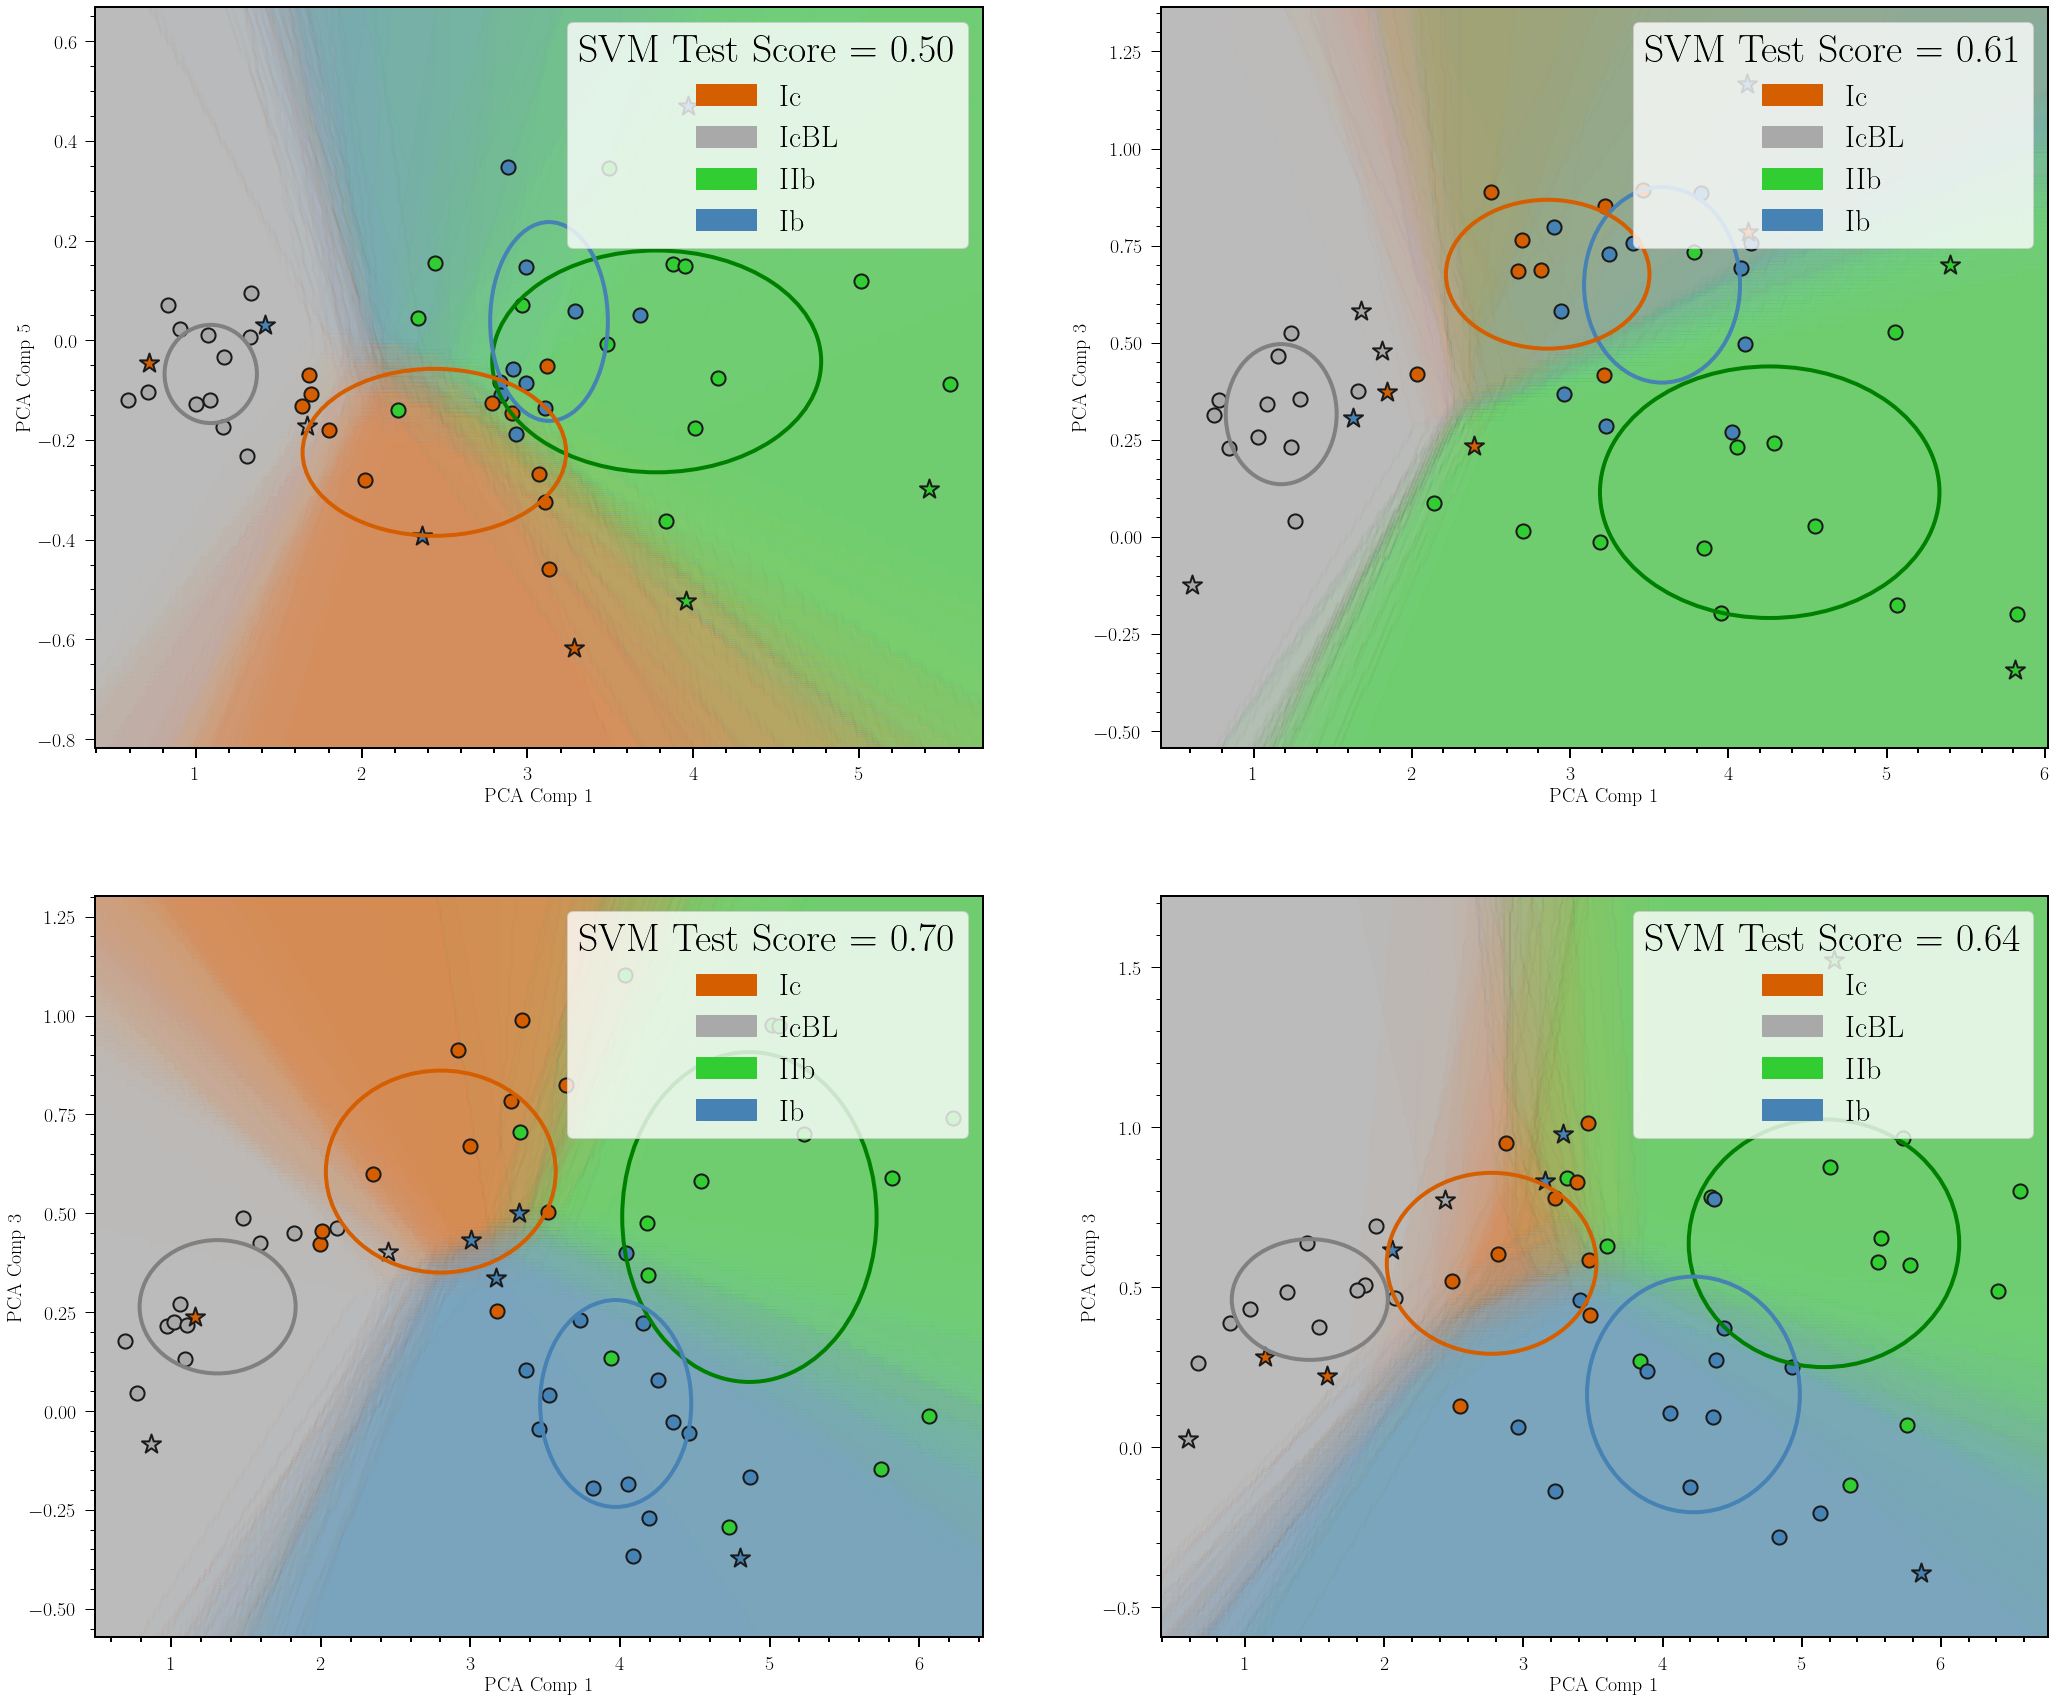

In [14]:
f_all, axs = plt.subplots(2,2,figsize=(35,30),gridspec_kw={'wspace':.2,'hspace':.2})
#Exclude Ib-pec and Ic-pec SNe
exclude = ['sn2007uy', 'sn2009er', 'sn2005ek']
svmsc=[]
f_all,svmsc,av0,std0=snidPCA0.pcaPlot(1,5,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,purity=True,
                                     excludeSNe=exclude, std_rad=1.0, svm=True, count=3, fig=f_all,
                                     ax=f_all.axes[0],ncv=50, markOutliers=True)
print(av0, std0)
svmsc=[]
f_all,svmsc, av5, std5=snidPCA5.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,purity=True, 
                                       excludeSNe=exclude,std_rad=1.0, svm=True, count=3, 
                                       fig=f_all, ax=f_all.axes[1], ncv=50, markOutliers=True)
print(av5, std5)
svmsc=[]
f_all,svmsc, av10, std10=snidPCA10.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                          purity=True,excludeSNe=exclude, std_rad=1.0, svm=True,
                                          count=3, fig=f_all, ax=f_all.axes[2],ncv=50, markOutliers=True)
print(av10, std10)
svmsc=[]
f_all,svmsc, av15, std15=snidPCA15.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                          purity=True, excludeSNe=exclude,std_rad=1.0,
                                          svm=True, count=3, fig=f_all, ax=f_all.axes[3],ncv=50, markOutliers=True)
print(av15, std15)

In [15]:
for i,ax in enumerate(f_all.axes):
    l = ax.get_legend()
    t = l.get_title()
    t.set_fontsize(30)
    ax.tick_params(axis='both',which='major', length=20,direction='inout',labelsize=35)
    ax.tick_params(axis='both',which='minor', length=10,direction='inout')
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    if i==0:
        l = ax.get_legend()
        t = l.get_title()
        l.set_title('')
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .3,'$t_{V_{max}} = 0 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av0,std0),fontsize=45)
        ax.set_ylabel('PC5', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
    elif i==1:
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .2,'$t_{V_{max}} = 5 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av5,std5),fontsize=45)
        ax.set_ylabel('PC3', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
        ax.get_legend().remove()
    elif i==2:
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .4,'$t_{V_{max}} = 10 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av10,std10),fontsize=45)
        ax.set_ylabel('PC3', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
        ax.get_legend().remove()
    else:
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .4,'$t_{V_{max}} = 15 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av15,std15),fontsize=45)
        ax.set_ylabel('PC3', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
        ax.get_legend().remove()

In [16]:
#IIb 2std outliers:  ['sn2016gkg' 'sn2011dh']
#Ib 2std outliers:  ['sn2004gq' 'sn2007uy' 'sn1998dt' 'sn2009er' 'sn2007kj']
#Ic 2std outliers:  ['sn2005az']
#IcBL 2std outliers:  ['sn2010bh']
ax = f_all.axes[0]

ax.text(-.22,1.25,'07uy',fontdict={'color':'k','fontsize':35})
ax.text(.352,.302,'09er',fontdict={'color':'k','fontsize':35})
ax.text(.6,-.82,'04gq',fontdict={'color':'k','fontsize':35})
ax.text(1.45,-0.85,'98dt',fontdict={'color':'k','fontsize':35})
ax.text(3.3,.69,'07kj',fontdict={'color':'k','fontsize':35})

ax.text(1.413,-2.14,'16gkg',fontdict={'color':'k','fontsize':35})
ax.text(4.15,1.08,'11dh',fontdict={'color':'k','fontsize':35})

ax.text(0.25,-0.25,'10bh',fontdict={'color':'k','fontsize':35})

ax.text(2.9,1.48,'05az',fontdict={'color':'k','fontsize':35})



#IIb 2std outliers:  ['sn2011ei' '10as']
#Ib 2std outliers:  ['sn1998dt' 'sn2009er' 'sn2007Y']
#Ic 2std outliers:  ['sn1990B']
#IcBL 2std outliers:  ['sn2002ap' '16coi']
ax = f_all.axes[1]

ax.text(2.11,-2.5,'11ei',fontdict={'color':'k','fontsize':35})
ax.text(5.1,1.8,'10as',fontdict={'color':'k','fontsize':35})

ax.text(0.08,-.31,'09er',fontdict={'color':'k','fontsize':35})
ax.text(4.56,.76,'07Y',fontdict={'color':'k','fontsize':35})
ax.text(1.58,-1.72,'98dt',fontdict={'color':'k','fontsize':35})

ax.text(2.7,-0.8,'90B',fontdict={'color':'k','fontsize':35})

ax.text(.75,.0,'02ap',fontdict={'color':'k','fontsize':35})
ax.text(.08,-.6,'16coi',fontdict={'color':'k','fontsize':35})

ax.text(-0.16,-1.12,'16gkg',fontdict={'color':'k','fontsize':35})

ax.text(-0.28,.55,'07bg',fontdict={'color':'k','fontsize':35})

ax.text(3.79,.66,'07kj',fontdict={'color':'k','fontsize':35})







#IIb 2std outliers:  ['sn2011ei']
#Ib 2std outliers:  ['sn2007uy' 'sn1990U' 'sn1990I']
#Ic 2std outliers:  ['sn1994I']
#IcBL 2std outliers:  ['sn2002ap' 'sn2007bg']
ax = f_all.axes[2]

ax.text(1.15,-.97,'07uy',fontdict={'color':'k','fontsize':35})
ax.text(1.39,-1.40,'90I',fontdict={'color':'k','fontsize':35})
ax.text(4.69,.28, '90U',fontdict={'color':'k','fontsize':35})


ax.text(2.56,-2.0,'11ei',fontdict={'color':'k','fontsize':35})

ax.text(2.99,-1.40,'94I',fontdict={'color':'k','fontsize':35})

ax.text(1.03,-.33,'02ap',fontdict={'color':'k','fontsize':35})
ax.text(-1.02,-.95,'07ru',fontdict={'color':'k','fontsize':35})

ax.text(1.72,-2.40,'99ex',fontdict={'color':'k','fontsize':35})





#IIb 2std outliers:  ['sn2011ei']
#Ib 2std outliers:  ['sn2007uy' 'sn1990I' 'sn2009er' 'sn2004gq' 'sn2007Y']
#Ic 2std outliers:  ['sn1994I']
#IcBL 2std outliers:  ['sn2010ay' '16coi']
ax = f_all.axes[3]

ax.text(.66,-1.18,'09er',fontdict={'color':'k','fontsize':35})
ax.text(.95,-1.79,'07uy',fontdict={'color':'k','fontsize':35})
ax.text(.85,-2.38,'90I',fontdict={'color':'k','fontsize':35})
ax.text(5.06,0.58,'07Y',fontdict={'color':'k','fontsize':35})
ax.text(2.08,-3.43,'04gq',fontdict={'color':'k','fontsize':35})

ax.text(3.72,-2.09,'11ei',fontdict={'color':'k','fontsize':35})

ax.text(2.34,-1.85,'94I',fontdict={'color':'k','fontsize':35})

ax.text(-.9,.88,'10ay',fontdict={'color':'k','fontsize':35})
ax.text(-0.4,-1.3,'16coi',fontdict={'color':'k','fontsize':35})

#ax.text(2.0, 1.0, 'Test', color='green',fontdict={'color':'k','fontsize':35}, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round',alpha=.5))

Text(-0.4, -1.3, '16coi')

In [17]:
# Since the new SN has phase = -3.7 it should 
# be plotted in the top left panel.
ax = f_all.axes[0]

ax.scatter([pca_coef[0]], [pca_coef[4]], color='purple', marker='*', s=2000)

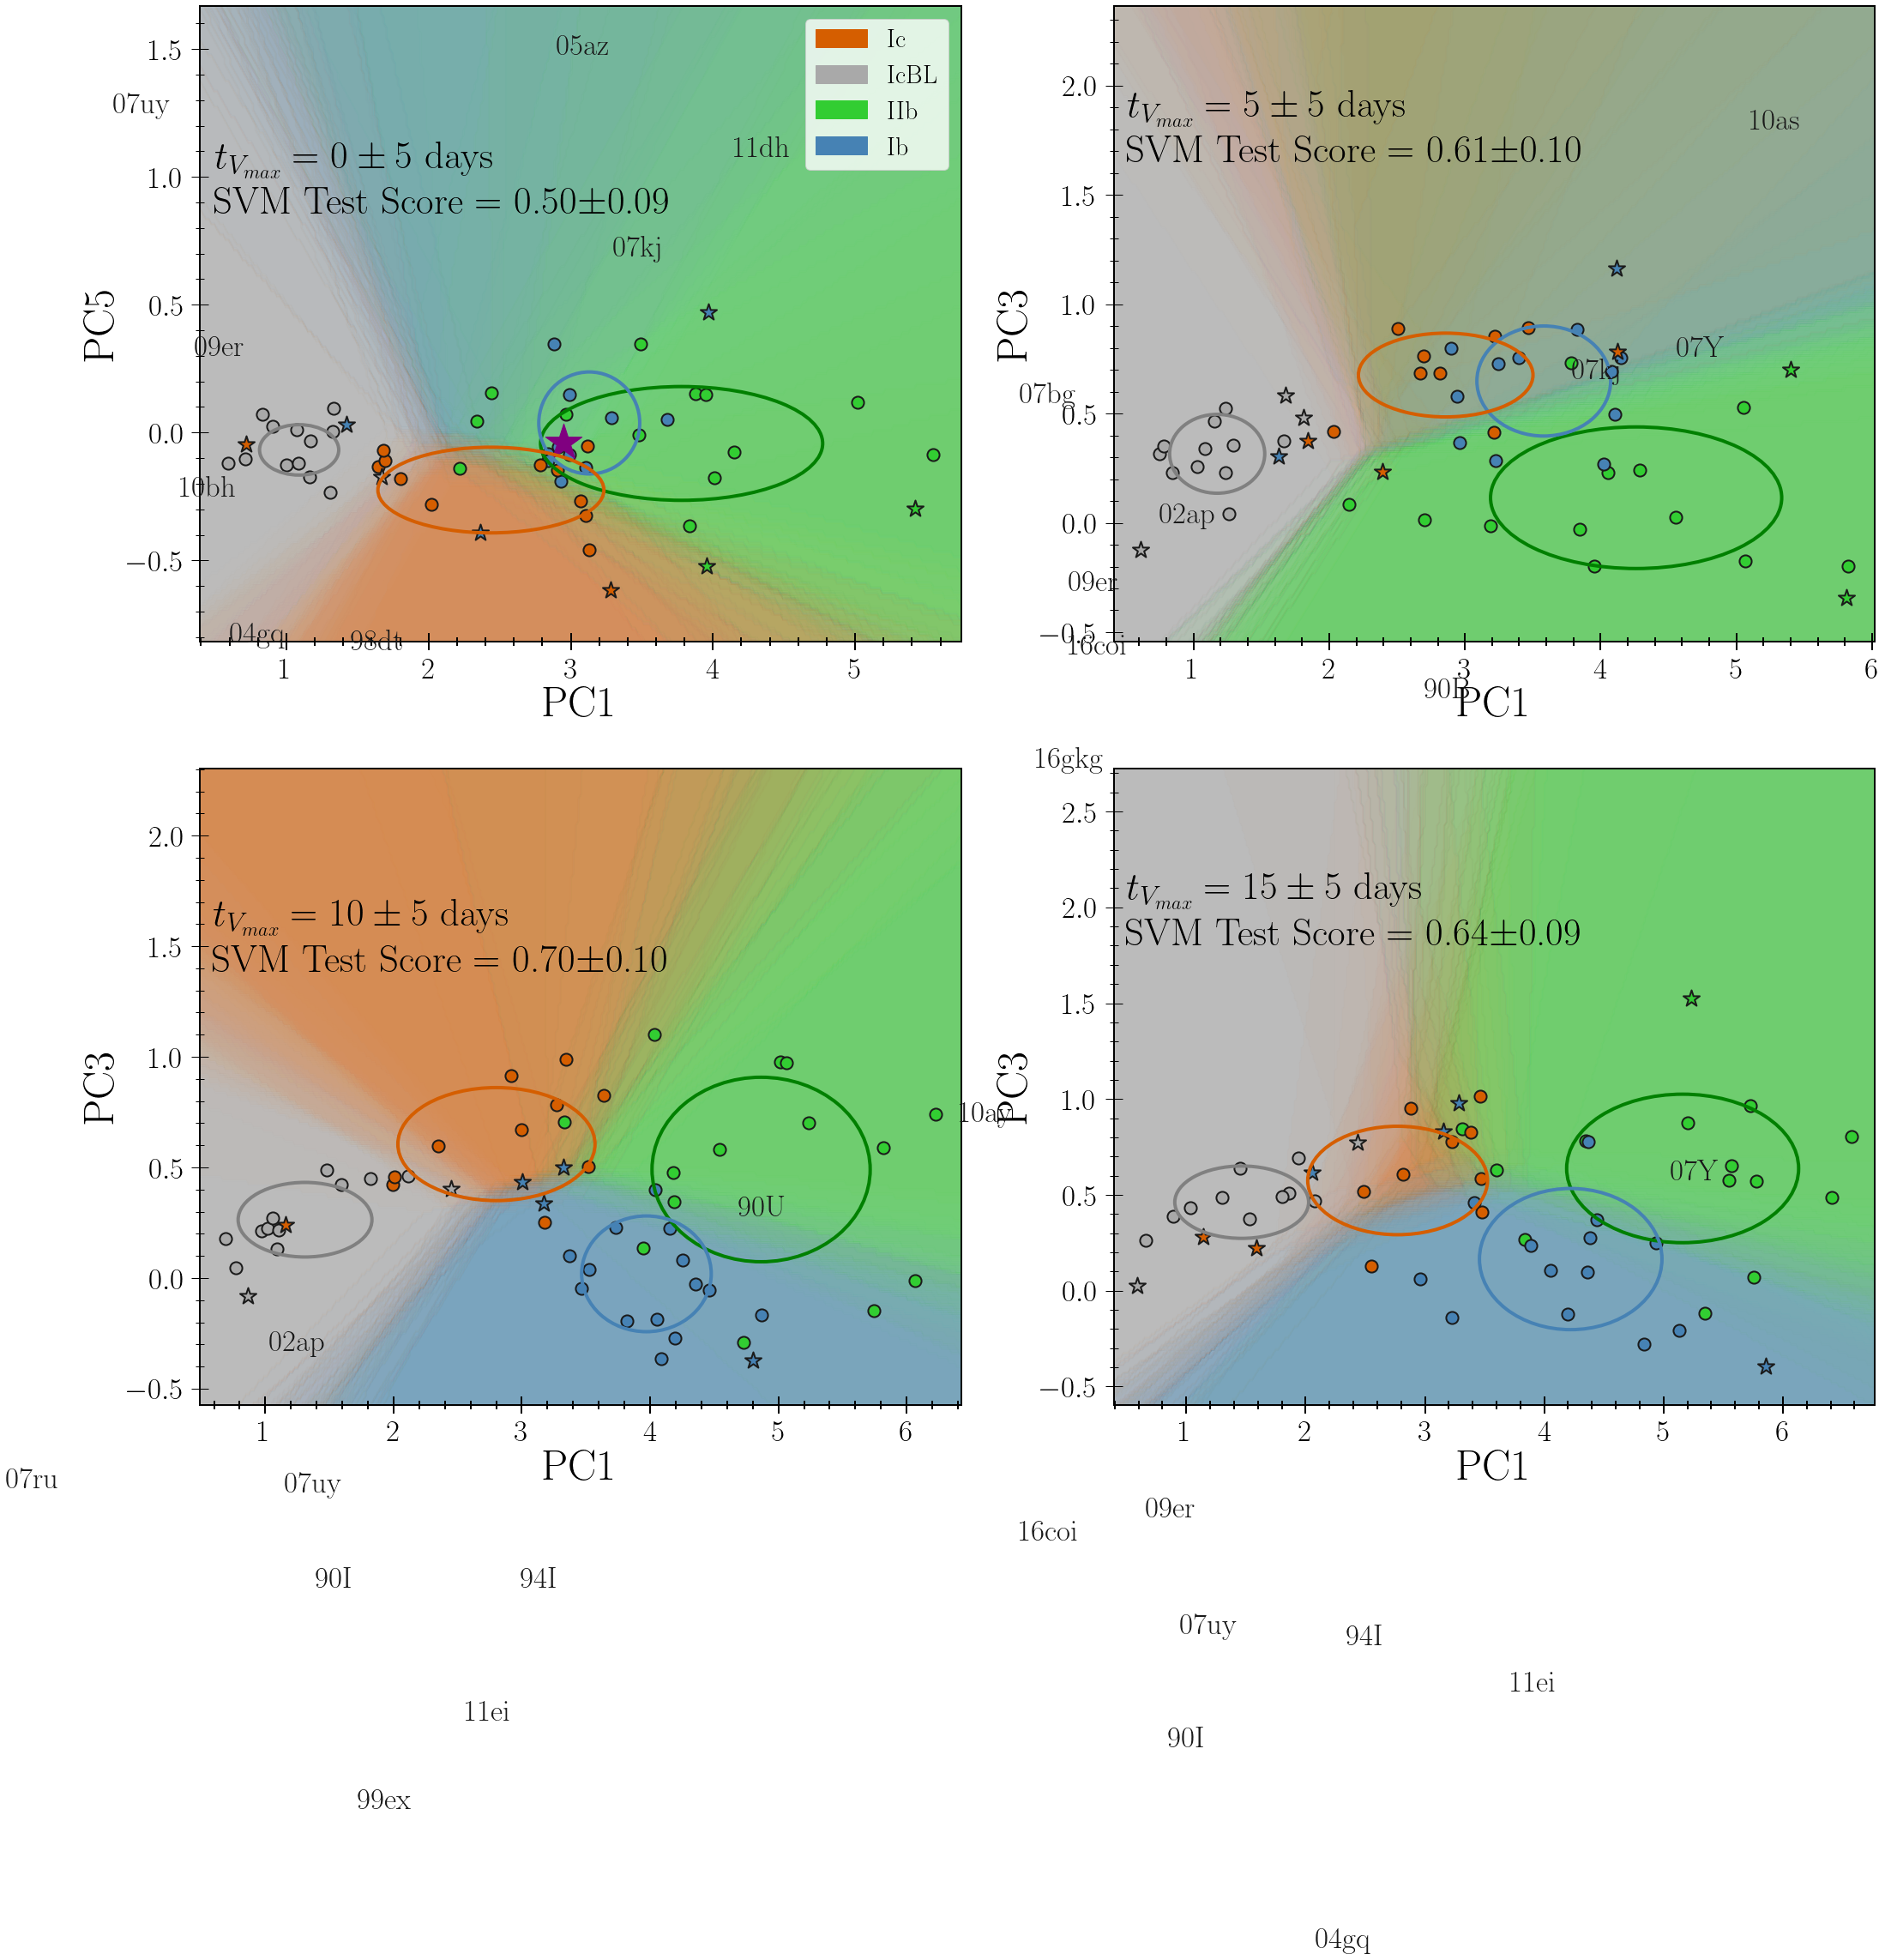

In [18]:
f_all